## Singular Value Decomposition ##

## $X=\sum \sigma u v^t$ ##

範例六

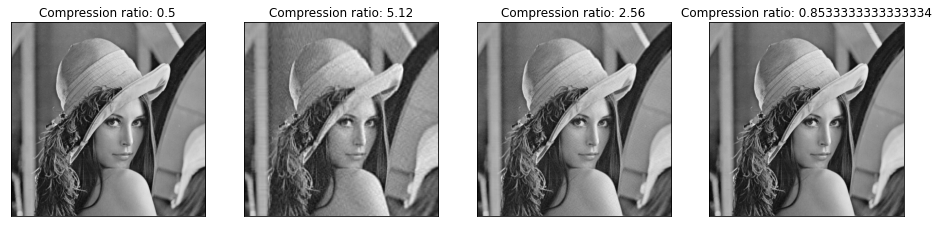

In [3]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgfile = '/Users/liang/Downloads/lenna.png' # 512x512x3 (512為大小，3:R,G,B)
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices = False)
# q = np.array([p/4, p/8, p/16]).astype('int')
q=np.array([512,50,100,300]).astype('int')#分別取512,50,100,300個主成分
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, r in enumerate(q):#影像壓縮
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]#欄@對角矩陣@列
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [4]:
imgfile = '/Users/liang/Downloads/lenna.png' # 512x512x3 (512為大小，3:R,G,B)
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape

### 把 X 重新排序在重跑 SVD，觀察不同 X 的排序下影像的呈現 ###

In [6]:
M=[]
for i in np.arange(0,512,16):
    for j in np.arange(0,512,16):
        M.append(X[i:i+16,j:j+16].reshape(-1,1))
        
       
M
M=np.array(M)
M
M = np.squeeze(M, axis=2)
M=M.T
M.shape

(256, 1024)

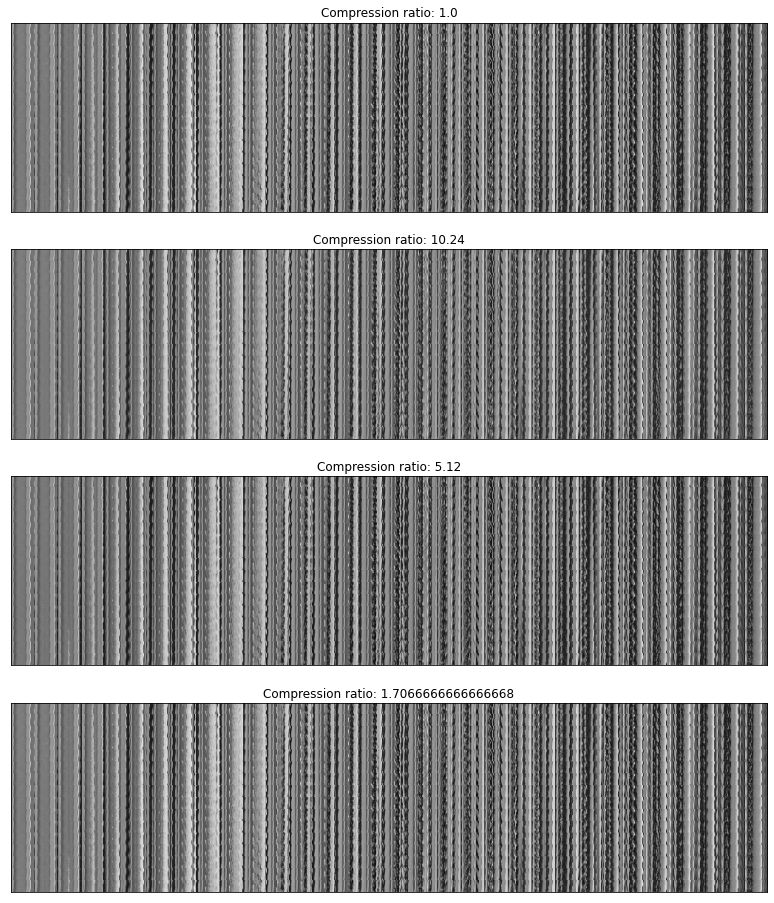

In [7]:
N, p = M.shape
U, E, VT = svd(M, full_matrices = False)
# q = np.array([p/4, p/8, p/16]).astype('int')
q=np.array([512,50,100,300]).astype('int')#分別取512,50,100,300個主成分
fig, ax = plt.subplots(4, 1, figsize=(16, 16))
for i, r in enumerate(q):#影像壓縮
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]#欄@對角矩陣@列
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [8]:
from sklearn.datasets import fetch_openml
# mnist = fetch_openml(’mnist_784’,parser=’auto’)
# X = mnist.data # data
# y = mnist.target # labels
X, y = fetch_openml('mnist_784', return_X_y = True)
X=X.T# 配合本文對於圖像矩陣的定義 pxN


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# X.shape#一張圖片的像素為784(28*28),共有70000張
X.info()#X為pandas格式，故用.iloc查看資料
X.iloc[:,0].unique()#裡面的數字分別為這張圖裡的亮度(0為黑色)


<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, pixel1 to pixel784
Columns: 70000 entries, 0 to 69999
dtypes: float64(70000)
memory usage: 418.7+ MB


array([  0.,   3.,  18., 126., 136., 175.,  26., 166., 255., 247., 127.,
        30.,  36.,  94., 154., 170., 253., 225., 172., 242., 195.,  64.,
        49., 238., 251.,  93.,  82.,  56.,  39., 219., 198., 182., 241.,
        80., 156., 107., 205.,  11.,  43.,  14.,   1.,  90., 139., 190.,
         2.,  70.,  35., 160., 108.,  81., 240., 119.,  25.,  45., 186.,
       150.,  27.,  16., 252., 187., 249.,  46., 130., 183., 207., 148.,
       229., 250.,  24., 114., 221., 201.,  78.,  23.,  66., 213., 171.,
         9.,  55., 226., 244., 133., 212., 135., 132.])

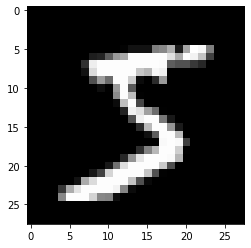

In [10]:
import matplotlib.pyplot as plt
import numpy as np
i=0
img = X.iloc[:, i]#第一張照片
sz = np.sqrt(len(img)).astype('int') 
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray') 
plt.show()

In [11]:
np.array(img).reshape(sz, sz)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

### 寫一個函式 montage( ) 用來排序影像資料 ###

In [12]:
def montage(A, m, n): 
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz 
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M


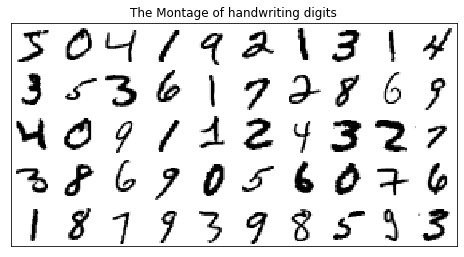

In [13]:
plt.figure(figsize = (8, 12))
m,n=5,10 #mxnmontage(totalmnimages)
M = montage(np.array(X), m, n)
plt.imshow(M, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()

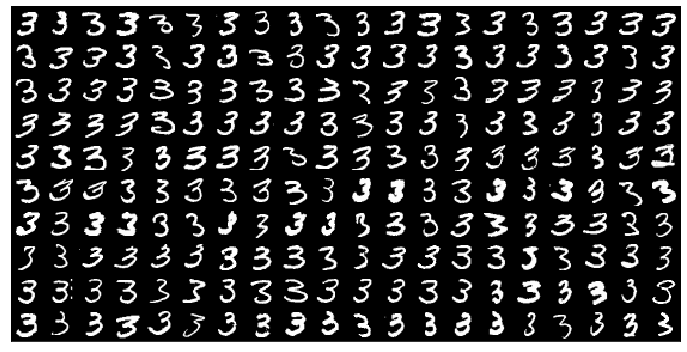

In [14]:
digit_to_show = '3'
idx = y[y==digit_to_show].index#y是對應的標籤(y:0~9)
# idx
Digit = X.iloc[:, idx]#784x7141
plt.figure(figsize = (12, 12))
m,n=10,20 #Amxnmontage(totalmnimages)
M = montage(np.array(Digit), m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest') 
plt.xticks([])
plt.yticks([])
plt.show()

### 取不同 q 個主成分後的影像還原(壓縮)效果 q=1,5,25 ###

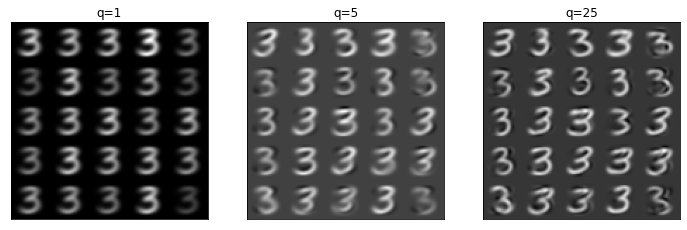

In [15]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# X=Digit
U,E,VT=svd(Digit,full_matrices=False)
q=np.array([1,5,25])
# q=5
m,n=5,5
fig,ax=plt.subplots(1,3,figsize=(12,4))
for i, r in enumerate(q):
    Xq=U[:,:r]@np.diag(E[:r])@VT[:r,:]
    ax[i].imshow(montage(Xq,m,n),cmap='gray')
    # ax[i]
    ax[i].set_title('q={}'.format(r))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()


### 取不同 q 個主成分後的影像還原(壓縮)效果。第 1-15 列取 q=1,3,5,...,29 ###

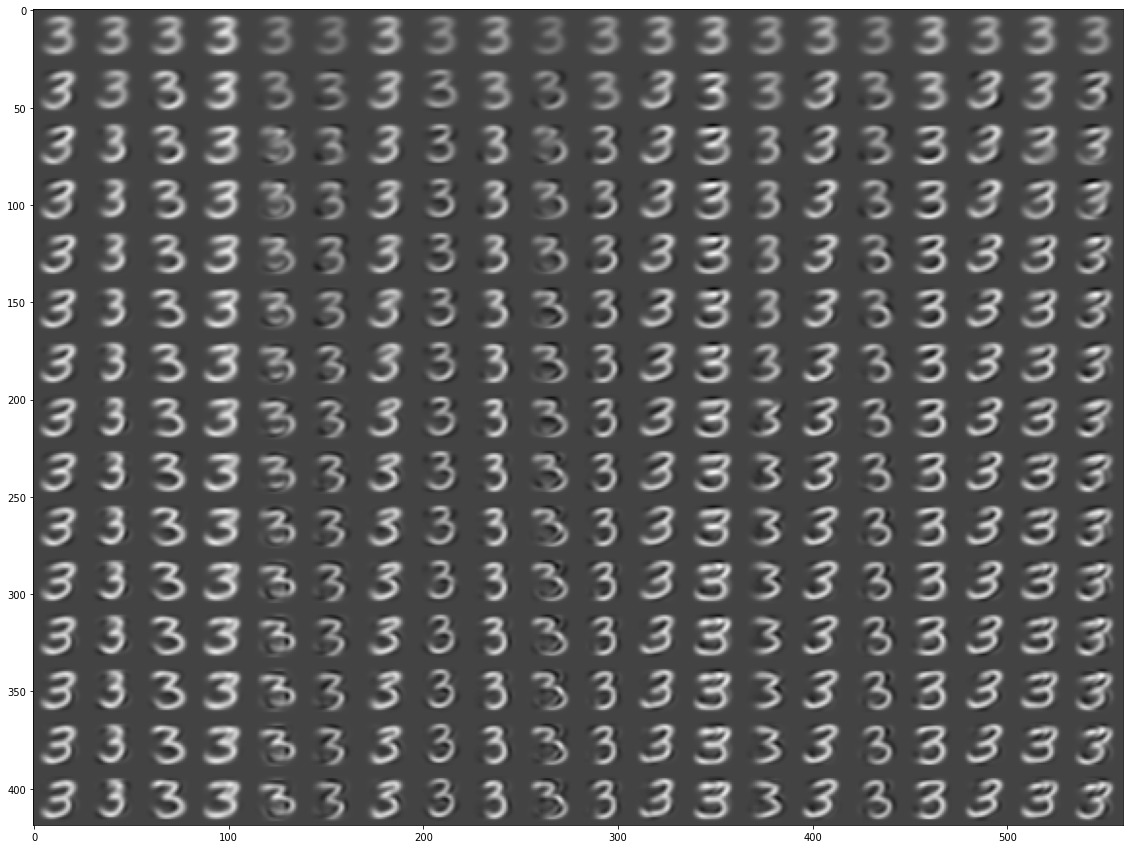

In [16]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# X=Digit
U,E,VT=svd(Digit,full_matrices=False)
# q=np.array([1,5,25])
q=np.arange(1,30,2)
# M=[]
M=np.zeros((28,560))
k=np.r_[M, montage(Xq,1,20)]
m,n=1,20
fig,ax=plt.subplots(1,figsize=(20,15))
for i, r in enumerate(q):
    Xq=U[:,:r]@np.diag(E[:r])@VT[:r,:]
    M=np.r_[M,montage(Xq,1,20)]
    # ax[i].imshow(montage(Xq,1,20),cmap='gray')
    # ax.set_title('q={}'.format(r))
    # ax[i].set_xticks([])
    # ax[i].set_yticks([])
ax.imshow(np.array(M[29:,:]),cmap='gray')
plt.show()

In [18]:
# U[:,:2]@np.diag(E[:2])@VT[:2,:]
# print(U[:,:2].shape,np.diag(E[:2]).shape,VT[:2,:].shape)
# np.diag([E[2]])

# E[2]
# print(np.matrix(U[:,1]).reshape(-1,1).shape,np.diag([E[1]]).shape,np.matrix(VT[1,:]).reshape(1,-1).shape)
np.matrix(U[:,1]).reshape(-1,1)@np.diag([E[1]])@np.matrix(VT[1,:]).reshape(1,-1)#x_2
# A=VT[1,:]

matrix([[ 1.47692900e-13,  6.43694760e-14, -1.88158702e-13, ...,
          1.21249327e-13,  2.12386455e-14, -5.82734527e-14],
        [ 5.41540632e-13,  2.36021412e-13, -6.89915242e-13, ...,
          4.44580867e-13,  7.78750333e-14, -2.13669327e-13],
        [-3.93847733e-13, -1.71651936e-13,  5.01756539e-13, ...,
         -3.23331539e-13, -5.66363879e-14,  1.55395874e-13],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### 觀察個別主成分的影像:第 1-6 列取 q = 1,2,··· ,6 個主成分。 ###

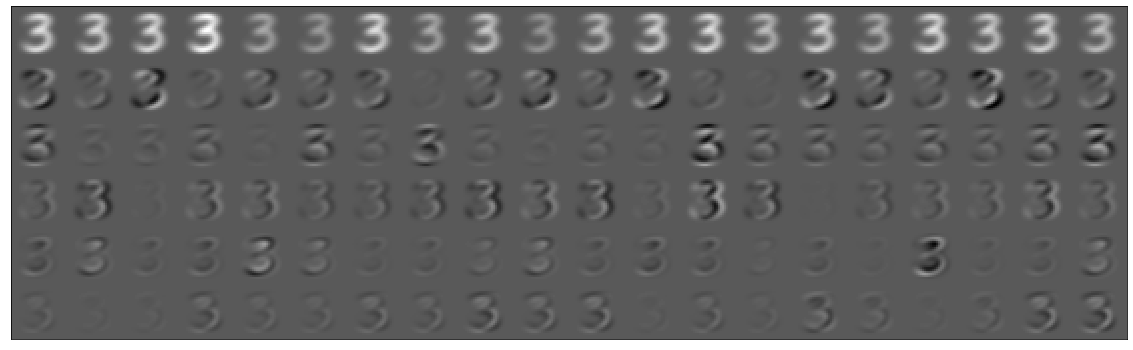

In [19]:
import numpy as np
from numpy.linalg import svd

U , E , VT = svd(Digit , full_matrices=False) 
m,n = 1,20
q= np.arange(1,7)
M=np.zeros((28,560))
fig ,ax =plt.subplots(figsize=(20,10))
for i , r in enumerate(q):
    # np.matrix(U[:,1]).reshape(-1,1)@np.diag([E[1]])@np.matrix(VT[1,:]).reshape(1,-1)#x_2
    Xq= np.matrix(U[:,r-1]).reshape(-1,1)@np.diag([E[r-1]])@np.matrix(VT[r-1,:]).reshape(1,-1)
    M=np.r_[M,montage(Xq,1,20)]
    # M = montage(np.array(Xq), m, n)
ax.imshow(np.array(M[29:,:]), cmap = "gray", interpolation = "nearest")

plt.xticks([])
plt.yticks([])
plt.show()

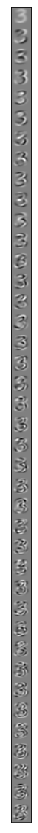

In [20]:
import numpy as np
from numpy.linalg import svd

U , E , VT = svd(Digit , full_matrices=False) 
m,n = 1, 1
q= np.arange(1,41)
M=np.zeros((28,28))
fig ,ax =plt.subplots(figsize=(25,15))
for i , r in enumerate(q):
    # np.matrix(U[:,1]).reshape(-1,1)@np.diag([E[1]])@np.matrix(VT[1,:]).reshape(1,-1)#x_2
    # Xq= np.matrix(U[:,r-1]).reshape(-1,1)@np.diag([E[r-1]])@np.matrix(VT[r-1,:]).reshape(1,-1)
    # U[:,r-1]
    M=np.r_[M,montage(U[:,r-1].reshape(-1,1),1,1)]
    # M = montage(np.array(U[:,r-1].reshape(-1,1)), m, n)
ax.imshow(np.array(M[29:,:]), cmap = plt.cm.gray_r, interpolation = "nearest")

plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
U[:,1].reshape(1,-1).shape

(1, 784)

(56, 28)


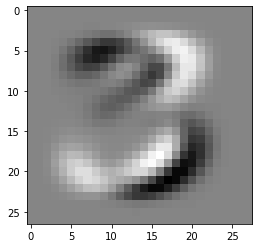

In [22]:
M=np.zeros((28,28))
M=np.r_[M,montage(U[:,1].reshape(-1,1),1,1)]
print(M.shape)
plt.imshow(np.array(M[29:,:]), cmap = plt.cm.gray_r, interpolation = "nearest")

In [23]:
import numpy as np
from numpy.linalg import svd

U , E , VT = svd(Digit , full_matrices=False) 
m,n = 1, 1
q= np.arange(1,101)
M=np.zeros((28,28))
fig ,ax =plt.subplots(figsize=(25,15))
for i , r in enumerate(q):
    # np.matrix(U[:,1]).reshape(-1,1)@np.diag([E[1]])@np.matrix(VT[1,:]).reshape(1,-1)#x_2
    # Xq= np.matrix(U[:,r-1]).reshape(-1,1)@np.diag([E[r-1]])@np.matrix(VT[r-1,:]).reshape(1,-1)
    # U[:,r-1]
    M=np.r_[M,montage(U[:,r-1].reshape(-1,1),1,1)]
M=np.delete(M,[i for i in np.arange(0,29)],axis=0)
ax.imshow(np.array(M), cmap = plt.cm.gray_r, interpolation = "nearest")

plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
import numpy as np
from numpy.linalg import svd

U , E , VT = svd(Digit , full_matrices=False) 
m,n = 1, 1
q= np.arange(1,101)
M=np.zeros((28,28))
fig ,ax =plt.subplots(figsize=(25,15))
for i , r in enumerate(q):
    # np.matrix(U[:,1]).reshape(-1,1)@np.diag([E[1]])@np.matrix(VT[1,:]).reshape(1,-1)#x_2
    # Xq= np.matrix(U[:,r-1]).reshape(-1,1)@np.diag([E[r-1]])@np.matrix(VT[r-1,:]).reshape(1,-1)
    # U[:,r-1]
    M=np.c_[M,montage(U[:,r-1].reshape(-1,1),1,1)]
M=np.delete(M,[i for i in np.arange(0,29)],axis=1)
ax.imshow(np.array(M), cmap = plt.cm.gray_r, interpolation = "nearest")

plt.xticks([])
plt.yticks([])
plt.show()

### $u_k$,k = 1,2,··· ,100 的「長相」 ###

(139, 560)

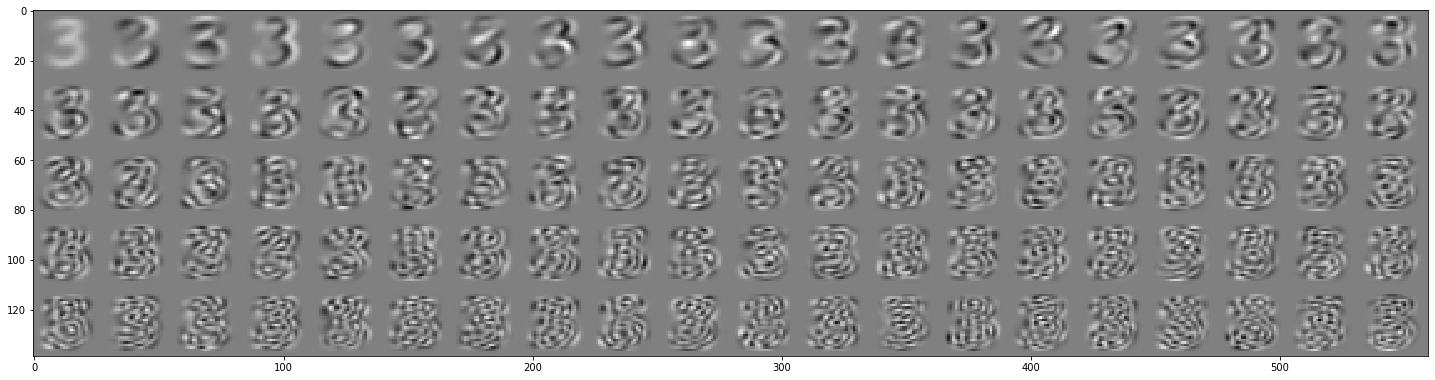

In [63]:
b=np.arange(1,21)
c=np.arange(1,6)
fig ,ax =plt.subplots(figsize=(25,15))
F=np.zeros((28,560))
for j,i in enumerate(c):
    M=np.zeros((28,28))
    for w,r in enumerate(b):
        M=np.c_[M,montage(U[:,((20*j)+r)-1].reshape(-1,1),1,1)]
    M=np.delete(M,[i for i in np.arange(0,28)],axis=1)    
    F=np.r_[F,M]
F=np.delete(F,[i for i in np.arange(0,29)],axis=0)
ax.imshow(np.array(F), cmap = plt.cm.gray_r, interpolation = "nearest")
F.shape    


In [59]:
c=np.arange(1,6)
b=np.arange(1,21)
for j,i in enumerate(c):
    print(j,i)
print('-----------------------------')
for w,r in enumerate(b):
    print(w,r)

0 1
1 2
2 3
3 4
4 5
-----------------------------
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
